In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd
# all necessary imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display
import re
from nltk.corpus import stopwords
from sklearn.metrics import log_loss
import string
import spacy
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import nltk
import ssl
from sklearn import metrics
import matplotlib.pyplot as plt

stopwords = stopwords.words('english')

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

train_data = {'query':['Who became the second place in 1974?', 'Which team became 6th place in 2006?', 'Which team was world champion in the year 2010?', 'Who won in 1990?', 'Who was the winner in 1934?',
        'Who became the world champion in 1938?', 'Which team won in 1974?', 'Which team was on the 5th place in the worldcup in 1950?',
        'Who got the 2nd place in 1986?', 'Who was the world-champion in the world-championship of 2018?', 'Which team is the champion of the year 2002?',

        'On which position was Germany in 1986?', 'Brasil got which place in 2014?', 'Which place was Morroco on in 2022?', 'What was the ranking of Sweden in 1958?', 
        'On which place did the Netherlands land on in the year 1974?', 'What was the placement of Italy in 1938?', 'What ranking did England have in the world-championship of 2010?',
        'What was Spain\'s ranking in 2018?', 'What was the placement of Poland in 2002?', 'Which place did France get in the worldcup 2018?',

        'Who hosted the world cup in the year 2018?', 'Which nation was the host of the world cup in 1950?', 'Where was the world cup 1958?', 'Where was the world cup held in 1958?',
        'Who was the host of the world-championship in 2002?', 'Which country hosted the world cup in the year 1978?', 'Where was the world cup held in 1990?',
        'Where did the world cup take place in the year 2006?', 'Who has hosted the worldcup in 1974?', 'In which country did the world cup take place in 2022?',

        'On average, how many goals were scored in 1998?', 'How many goals were scored in the world-championship of 1962 on average?', 'What were the average goals scored in 1986?', 'What was the average number of goals scored in 1930?',
        'What was the average of goals in 1974?', 'How many goals have been scored on average in the year 2002? ', 'How many goals were scored on average in 1990?',
        'In the worldcup 1962, how many goals have been scored on average?', 'What was the average number of goals scored in the year 1962?', 'What was the average number of goals in 1938?', 'What amount of goals was scored in 1990 in average?',

        'How many goals were scored 1950?', 'How many goals in the world-championship of 2010?', 'What is the number of overall goals in 2022?', 'How many goals were made in 2002?',
        'How many goals were accumulated in 2018?', 'What was the total of goals in 1960?', 'What was the total number of goals in 1930?',
        'What is the sum of all goals scored in the year 1938?', 'What is the total number of goals scored in the worldcup of 1950?', 'How many goals were scored in the world cup in 1990?', 'What amount of goals was scored in 1990?',

        'How many matches were played in the world-championship of 1930?','What is the number of matches played in 1954?','What was the amount of matches in the 2010 worldcup?', 'How many matches were played in Germany in 2006?',
        'What is the total number of games played in the year 2002?', 'What is the sum of matches played in 1974?', 'In 2018, how many matches took place?',
        'How many matches have been played in 1950?', 'How many games were played in 1974?', 'What is the total of matches played in 1978?',

        'Who was the winner of the world cup in 1990?','Name the champion of 2000?','Which nation was the world champion in the year 2014?','Which nation was the world-champion in the year 2014?','Which team was the first place in 2002?', 'Who won in 2010?',
        'Who won the world cup in 1974?', 'Who was world-champion in 1950?', 'Who got the first place of the world cup in 2002?',
        'Who was the winner of the world-championship in 2006?', 'Who was the champion of the worldcup in 2010?',

        'Hello.', 'Hellooo', 'Hi!', 'Hey,', 'Heyyy,', 'Good day!', 'Good evening.',

        'Thank you!', 'Thanks', 'Thank you very much!', 'Okay, thanksie!',

        'Goodbye', 'Bye', 'See you!', 'Byebyeee', 'Have a nice day'],


       'category':['PlacementTeam', 'PlacementTeam','PlacementTeam','PlacementTeam','PlacementTeam',
       'PlacementTeam','PlacementTeam','PlacementTeam',
       'PlacementTeam','PlacementTeam','PlacementTeam',

       'TeamPlacement','TeamPlacement','TeamPlacement','TeamPlacement',
       'TeamPlacement','TeamPlacement','TeamPlacement',
       'TeamPlacement','TeamPlacement','TeamPlacement',

       'YearHost','YearHost','YearHost','YearHost',
       'YearHost','YearHost','YearHost',
       'YearHost','YearHost','YearHost',

       'year(avg)Goals','year(avg)Goals','year(avg)Goals','year(avg)Goals',
       'year(avg)Goals','year(avg)Goals','year(avg)Goals',
       'year(avg)Goals','year(avg)Goals','year(avg)Goals','year(avg)Goals',

       'yearGoals','yearGoals','yearGoals','yearGoals',
       'yearGoals','yearGoals','yearGoals',
       'yearGoals','yearGoals','yearGoals','yearGoals',

       'yearMatches','yearMatches','yearMatches','yearMatches',
       'yearMatches','yearMatches','yearMatches', 
       'yearMatches','yearMatches','yearMatches', 

       'firstPlace', 'firstPlace', 'firstPlace','firstPlace','firstPlace','firstPlace', 
       'firstPlace','firstPlace','firstPlace',
       'firstPlace', 'firstPlace',
       
       'greeting', 'greeting', 'greeting', 'greeting', 'greeting', 'greeting','greeting',
       
       'thankYou', 'thankYou', 'thankYou', 'thankYou', 
       
       'bye', 'bye', 'bye', 'bye', 'bye']}

test_data = {'query':['Which team became the third place in 1954?', 'Which country was the fifth place in 2010',

        'What place became Argentinia in 2022?', 'Which position was Germany in the year 2002?',

        'In which country was the World Cup in 1950?', 'Who hosted the World cup in 1946?',

        'What amount of goals was scored in 1990 in average?', 'How many goals were scored in average in 1986?',

        'How many goals have been scored in the year 1982?', 'What amount of goals was scored in 1958?',

        'How many matches took place in 1918?', 'What number of matches were played in 1994',

        'Who won the World Cup in 1954?', 'What team became the first place in 2002?',

        'Hi', 'Good morning',

        'Thank you', 'Thanks',

        'Bye', 'Goodbye!'],


       'category':['PlacementTeam','PlacementTeam',

       'TeamPlacement','TeamPlacement',

       'YearHost','YearHost',

       'year(avg)Goals','year(avg)Goals',

       'yearGoals','yearGoals',

       'yearMatches','yearMatches', 

       'firstPlace', 'firstPlace',
       
       'greeting', 'greeting',
       
       'thankYou', 'thankYou',
       
       'bye', 'bye']}


df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)

nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
punctuations = string.punctuation

#remove pronouns, stopwords, and puncuation as a definied function 
def cleanup_text(docs, logging=False):
    texts = [] 
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-'] #Lemmatization and lowercasing
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations] #removing stopwords
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

train_cleaned = cleanup_text(df_train['query'], logging=True)

# further cleaning to apply a word2vec model
def cleanup_text_word2vec(docs, logging=False):
    sentences = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents" % (counter, len(docs)))
        doc = nlp(doc, disable=['tagger'])
        doc = " ".join([tok.lemma_.lower() for tok in doc])
        doc = re.split("[\.?!;] ", doc) #splitting text into sentences and words
        doc = [re.sub("[\.,;:!?]", "", sent) for sent in doc]
        doc = [sent.split() for sent in doc]
        sentences += doc
        counter += 1
    return sentences #list of lists

train_cleaned_word2vec = cleanup_text_word2vec(df_train['query'], logging=True)
#creating a corpus by joining list of lists of words and fit to tf-idf vectorizer (convert to numerical representation)
corpus_train = [" ".join(i) for i in train_cleaned_word2vec]
vectorizer = TfidfVectorizer()
vec_fit = vectorizer.fit(corpus_train)

# Define function to create word vectors given a cleaned piece of text.
def create_average_vec(doc):
    average = np.zeros(len(vectorizer.get_feature_names()), dtype='float32')
    num_words = 0.
    for word in doc.split():
        average = np.add(average, vec_fit.transform([word]).toarray())
        num_words += 1.
    if num_words != 0.:
        average = np.divide(average, num_words)
    return average

# Create word vectors for entire cleaned dataset
train_cleaned_vec = np.zeros((df_train.shape[0], len(vectorizer.get_feature_names())), dtype="float32")

for i in range(len(train_cleaned)):
    train_cleaned_vec[i] = create_average_vec(train_cleaned[i])

Encoder = LabelEncoder()
y_train = Encoder.fit_transform(df_train['category'])
y_test = Encoder.fit_transform(df_test['category'])

#k-fold cross validation to evaluate the performance of the trained model 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']} 
svclassifier = SVC(probability = True)
#svclassifier.fit(train_cleaned_vec, y_train)
kfold = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(svclassifier, param_grid, cv=kfold, refit=True, verbose=3)
grid_search.fit(train_cleaned_vec, y_train)

# Train the model with the best hyperparameters
svclassifier = SVC(C=grid_search.best_params_['C'],
                gamma=grid_search.best_params_['gamma'],
                kernel=grid_search.best_params_['kernel'])
svclassifier.fit(train_cleaned_vec, y_train)

intent_categories = list(Encoder.classes_)
y_pred = []
for i in range(len(df_test)):
    cleanup = cleanup_text([df_test['query'][i]], logging=True)
    cleanup_vec = np.zeros((1, len(vectorizer.get_feature_names())), dtype="float32")
    for i in range(len(cleanup)):
        cleanup_vec[i] = create_average_vec(cleanup[i])
    y = svclassifier.predict([cleanup_vec[0]])
    intent = intent_categories[int(y)]
    y_pred.append(intent)

y_test = list(df_test['category'])

df = pd.DataFrame({'y_actual': y_test, 'y_predicted': y_pred})



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bnnlukas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.167 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.056 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.167 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.056 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.167 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.f

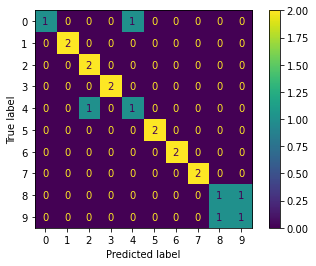

In [39]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
print(len(df_train))
print(len(y_pred))
accuracy_score(y_test, y_pred)

90
20


0.8